<a href="https://colab.research.google.com/github/Prartz/TechnohacK/blob/main/Task2_Employee_turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # Display all columns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [4]:
data= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
#checking the data set with shape to see how many rows and columns
data.shape

(1470, 35)

In [6]:
# null values check
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data['EmployeeNumber'].duplicated().sum()

0

In [9]:
## glancing unique values for each column in the data set
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique values in Attrition: ['Yes' 'No']
Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 131

In [10]:
cols_to_drop = ['EmployeeCount','EmployeeCount','Over18','StandardHours']
data = data.drop(columns = cols_to_drop )

In [11]:
print(data['Attrition'].unique())
data['Attrition']= data['Attrition'].replace(['Yes' ,'No'],[1,0]) ##converting to numeric

['Yes' 'No']


In [12]:
round(data['Attrition'].mean()*100,1)

16.1

In [13]:
##taking a look at all the columns once again
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
data.groupby('Department')['Attrition'].agg(['sum','count','mean']).sort_values(by='mean', ascending = False).reset_index()

,Department,sum,count,mean
0,Sales,92,446,0.206278
1,Human Resources,12,63,0.190476
2,Research & Development,133,961,0.138398


In [15]:
data.groupby('JobLevel')['Attrition'].agg({'sum','count','mean'}).reset_index()

,JobLevel,count,mean,sum
0,1,543,0.263352,143
1,2,534,0.097378,52
2,3,218,0.146789,32
3,4,106,0.047170,5
4,5,69,0.072464,5


In [16]:
data.groupby('JobRole')['Attrition'].agg({'sum','count','mean'}).sort_values(by= 'mean', ascending = False).reset_index()

,JobRole,count,mean,sum
0,Sales Representative,83,0.397590,33
1,Laboratory Technician,259,0.239382,62
2,Human Resources,52,0.230769,12
3,Sales Executive,326,0.174847,57
4,Research Scientist,292,0.160959,47
5,Manufacturing Director,145,0.068966,10
6,Healthcare Representative,131,0.068702,9
7,Manager,102,0.049020,5
8,Research Director,80,0.025000,2


In [17]:
data.groupby(['Department','JobRole'])['Attrition'].agg({'sum','count','mean'}).reset_index()

,Department,JobRole,count,mean,sum
0,Human Resources,Human Resources,52,0.230769,12
1,Human Resources,Manager,11,0.000000,0
2,Research & Development,Healthcare Representative,131,0.068702,9
3,Research & Development,Laboratory Technician,259,0.239382,62
4,Research & Development,Manager,54,0.055556,3
5,Research & Development,Manufacturing Director,145,0.068966,10
6,Research & Development,Research Director,80,0.025000,2
7,Research & Development,Research Scientist,292,0.160959,47
8,Sales,Manager,37,0.054054,2
9,Sales,Sales Executive,326,0.174847,57


In [18]:
data.groupby(['Department','JobRole','JobLevel'])['Attrition'].agg({'sum','count','mean'}).reset_index()

,Department,JobRole,JobLevel,count,mean,sum
0,Human Resources,Human Resources,1,33,0.303030,10
1,Human Resources,Human Resources,2,13,0.000000,0
2,Human Resources,Human Resources,3,6,0.333333,2
3,Human Resources,Manager,4,4,0.000000,0
4,Human Resources,Manager,5,7,0.000000,0
5,Research & Development,Healthcare Representative,2,78,0.038462,3
6,Research & Development,Healthcare Representative,3,44,0.113636,5
7,Research & Development,Healthcare Representative,4,9,0.111111,1
8,Research & Development,Laboratory Technician,1,200,0.280000,56
9,Research & Development,Laboratory Technician,2,56,0.089286,5


In [19]:
data.groupby(['BusinessTravel'])['Attrition'].agg({'sum','count','mean'}).reset_index()

,BusinessTravel,count,mean,sum
0,Non-Travel,150,0.080000,12
1,Travel_Frequently,277,0.249097,69
2,Travel_Rarely,1043,0.149569,156


In [20]:
data.groupby(['Department','BusinessTravel'])['Attrition'].agg({'sum','count','mean'}).reset_index()

,Department,BusinessTravel,count,mean,sum
0,Human Resources,Non-Travel,6,0.000000,0
1,Human Resources,Travel_Frequently,11,0.363636,4
2,Human Resources,Travel_Rarely,46,0.173913,8
3,Research & Development,Non-Travel,97,0.082474,8
4,Research & Development,Travel_Frequently,182,0.203297,37
5,Research & Development,Travel_Rarely,682,0.129032,88
6,Sales,Non-Travel,47,0.085106,4
7,Sales,Travel_Frequently,84,0.333333,28
8,Sales,Travel_Rarely,315,0.190476,60


In [21]:
tenure_cols= ['Attrition','TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']
Tenure_df= data[tenure_cols]

##let us do some binning 0-1 yrs,1-2 yrs,,2-5 yrs,5-10 yrs ,10-15 yrs

bins = [0, 2, 5, 10,50]

# Define bin labels
bin_labels = [ '0-2', '2-5', '5-10','10-50']

# Use cut() function to bin the data
Tenure_df['TotalWorkingYears_Bin'] = pd.cut(Tenure_df['TotalWorkingYears'], bins=bins, labels=bin_labels, right=False)
Tenure_df['YearsAtCompany_Bin'] = pd.cut(Tenure_df['YearsAtCompany'], bins=bins, labels=bin_labels, right=False)
Tenure_df['YearsInCurrentRole_Bin'] = pd.cut(Tenure_df['YearsInCurrentRole'], bins=bins, labels=bin_labels, right=False)

In [22]:
Tenure_df.groupby('TotalWorkingYears_Bin')['Attrition'].agg({'sum','count','mean'})

,count,mean,sum
TotalWorkingYears_Bin,,,
0-2,92,0.489130,45
2-5,136,0.220588,30
5-10,493,0.166329,82
10-50,749,0.106809,80


In [23]:
Tenure_df.groupby('YearsInCurrentRole_Bin')['Attrition'].agg({'sum','count','mean'})

,count,mean,sum
YearsInCurrentRole_Bin,,,
0-2,301,0.279070,84
2-5,611,0.162029,99
5-10,451,0.104213,47
10-50,107,0.065421,7


In [24]:
Tenure_df['YearsAtCompany_Bin'].value_counts(normalize = True)

5-10     0.356463
10-50    0.248980
2-5      0.248299
0-2      0.146259
Name: YearsAtCompany_Bin, dtype: float64

In [25]:
data.columns
compensation_variables =['Attrition','HourlyRate','MonthlyIncome', 'MonthlyRate', 'StockOptionLevel']
rewards = ['Attrition', 'PercentSalaryHike', 'StockOptionLevel','YearsSinceLastPromotion']
satisfaction_variables =['Attrition','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']

In [26]:
sat_score= data[satisfaction_variables].groupby('Attrition').mean()
sat_score

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance
Attrition,,,,,
0,2.771290,2.770479,2.778589,2.733982,2.781022
1,2.464135,2.518987,2.468354,2.599156,2.658228


Text(0.5, 1.0, 'Box Plot for MonthlyRate vs. Attrition')

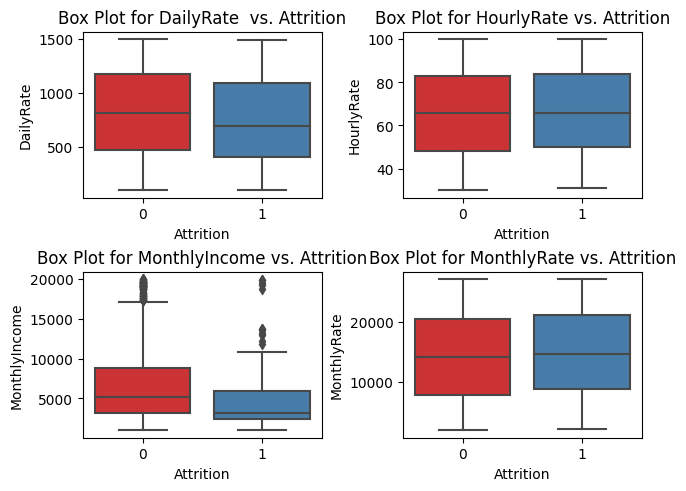

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
#subplot1
sns.boxplot(x= 'Attrition',y ='DailyRate' , data= data , palette = 'Set1',ax= axes[0,0])
axes[0,0].set_title('Box Plot for DailyRate  vs. Attrition')
#subplot2
sns.boxplot(x= 'Attrition',y ='HourlyRate' , data= data , palette = 'Set1',ax= axes[0,1])
axes[0,1].set_title('Box Plot for HourlyRate vs. Attrition')
#subplot3
sns.boxplot(x= 'Attrition',y ='MonthlyIncome' , data= data , palette = 'Set1',ax= axes[1,0])
axes[1,0].set_title('Box Plot for MonthlyIncome vs. Attrition')
#subplot4
sns.boxplot(x= 'Attrition',y ='MonthlyRate' , data= data , palette = 'Set1',ax= axes[1,1])
axes[1,1].set_title('Box Plot for MonthlyRate vs. Attrition')

In [28]:
rewards = ['Attrition', 'PercentSalaryHike', 'StockOptionLevel','YearsSinceLastPromotion']

Text(0.5, 1.0, 'Box Plot for OverTime vs. Attrition')

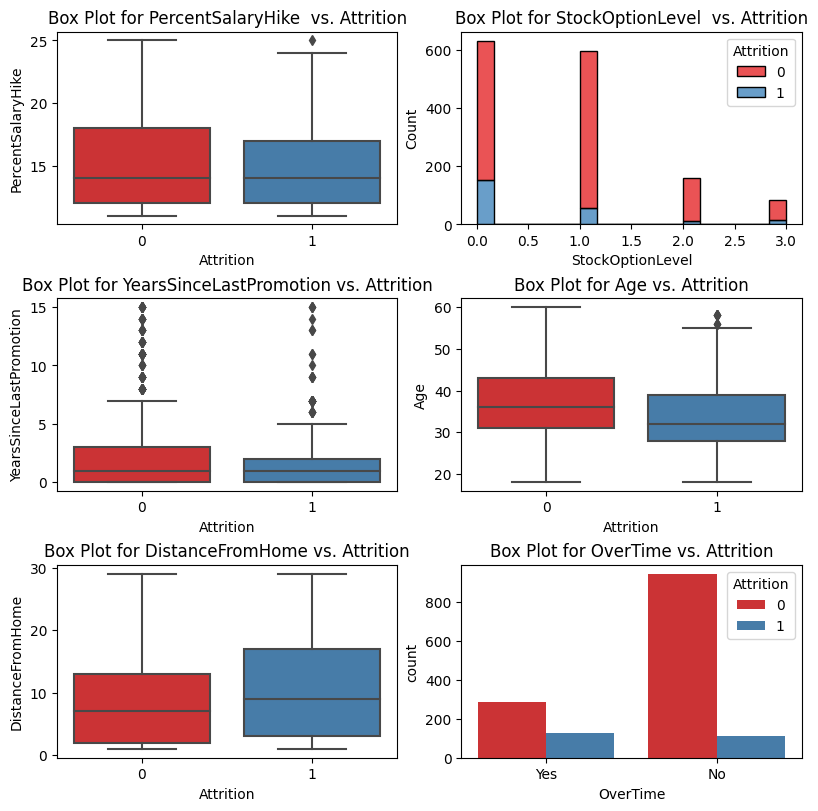

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True,figsize=(8, 8))
sns.boxplot(x= 'Attrition',y ='PercentSalaryHike' , data= data ,palette = 'Set1',ax= axes[0,0])
axes[0,0].set_title('Box Plot for PercentSalaryHike  vs. Attrition')
sns.histplot(x ='StockOptionLevel' , hue= 'Attrition',multiple = 'stack',data= data ,palette = 'Set1',ax= axes[0,1])
axes[0,1].set_title('Box Plot for StockOptionLevel  vs. Attrition')
#subplot3
sns.boxplot(x= 'Attrition',y ='YearsSinceLastPromotion' , data= data , palette = 'Set1',ax= axes[1,0])
axes[1,0].set_title('Box Plot for YearsSinceLastPromotion vs. Attrition')
#subplot4
sns.boxplot(x= 'Attrition',y ='Age' , data= data , palette = 'Set1',ax= axes[1,1])
axes[1,1].set_title('Box Plot for Age vs. Attrition')
#subplot5
sns.boxplot(x= 'Attrition',y ='DistanceFromHome' , data= data , palette = 'Set1',ax= axes[2,0])
axes[2,0].set_title('Box Plot for DistanceFromHome vs. Attrition')
#subplot6
sns.countplot(x='OverTime' , hue= 'Attrition',data= data , palette = 'Set1',ax= axes[2,1])
axes[2,1].set_title('Box Plot for OverTime vs. Attrition')

In [30]:
data = pd.get_dummies(data, drop_first =  True)

<Axes: >

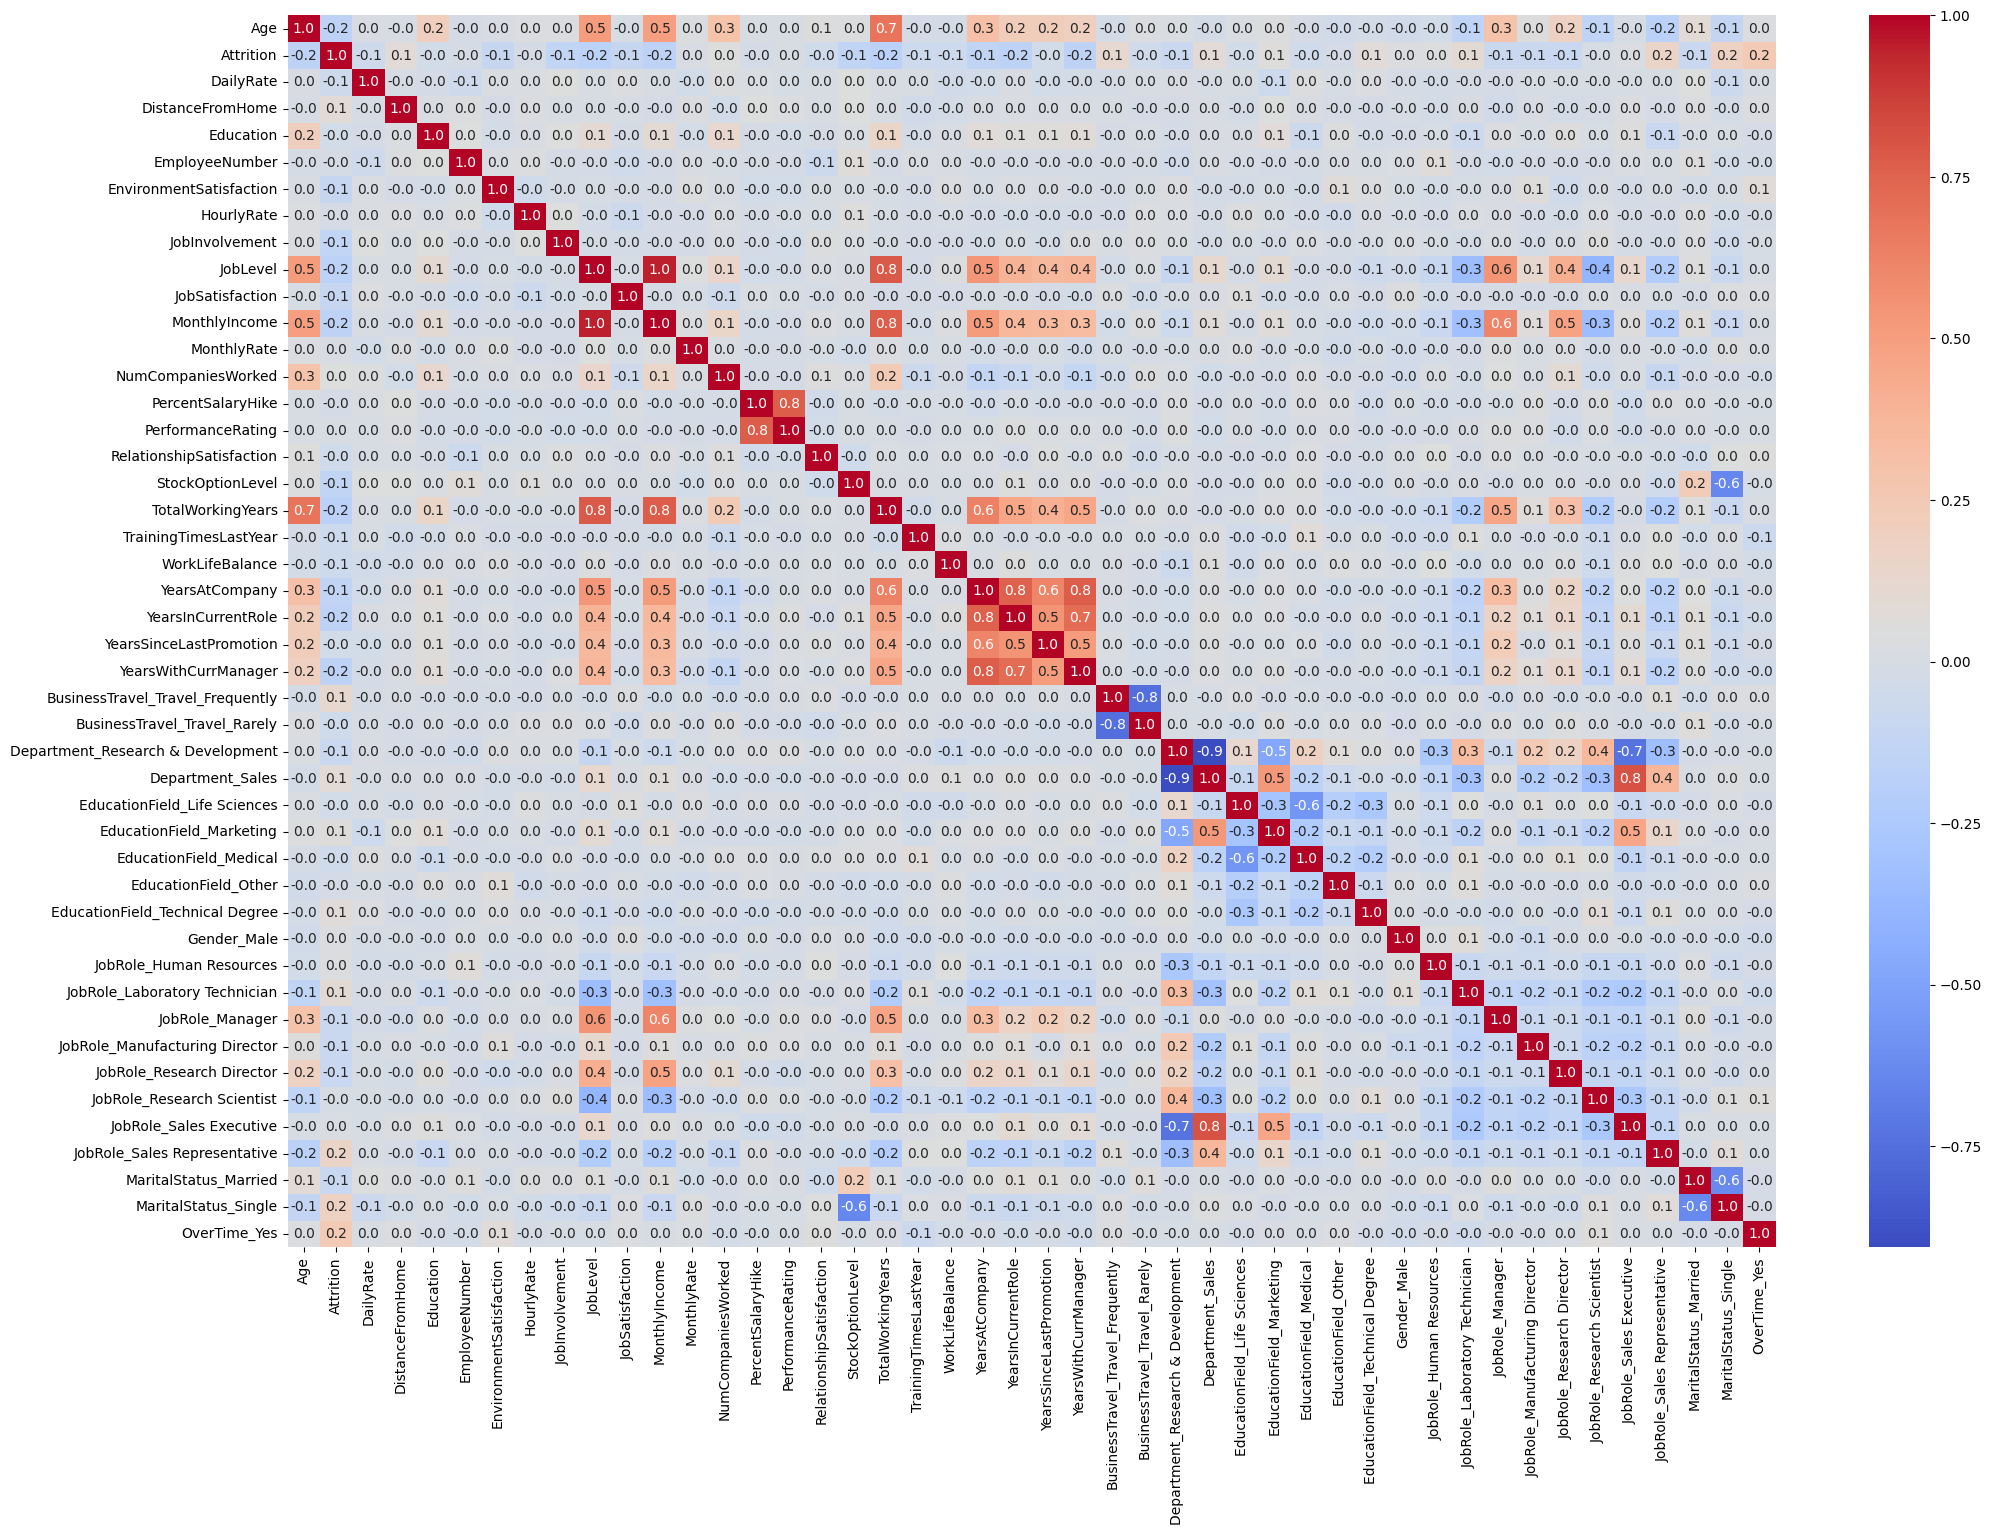

In [31]:
correlation_matrix= data.corr()
plt.figure(figsize = (24,16))
heatmap_= sns.heatmap(correlation_matrix, annot = True, cmap= 'coolwarm', fmt= '.1f')
heatmap_

In [33]:
threshold = 0.8
correlation_mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)
highly_correlated_vars = []

for col in correlation_matrix.columns:
    correlated_cols = correlation_mask.index[correlation_mask[col]]
    if len(correlated_cols) > 0:
        highly_correlated_vars.append(col)
        highly_correlated_vars.extend(correlated_cols)

highly_correlated_vars = list(set(highly_correlated_vars))

print("Highly correlated variables:", highly_correlated_vars)


Highly correlated variables: ['MonthlyIncome', 'Department_Research & Development', 'Department_Sales', 'JobRole_Sales Executive', 'JobLevel']


In [34]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [35]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [36]:
y


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [37]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [38]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)

X_train.shape (1176, 45)
y_train.shape (1176,)
X_test.shape (294, 45)
y_test.shape (294,)


In [39]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)

In [40]:
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [41]:
y_pred = classifier_lr.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(y_test, y_pred)

In [43]:
results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.836735,0.04,1.0,0.020408


In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[245   0]
 [ 48   1]]


In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 84.01%
Standard Deviation is 0.62%


Sales department has a 20% attrition rate despite having fewer employees than R&D, suggesting a potential issue that requires investigation.

HR department has a 30% attrition rate among level 1 employees, mainly due to a smaller denominator.

R&D department has the majority of employees with a 13.4% attrition rate, slightly higher than the benchmark.

Attrition is high at 26% for job level 1 employees, indicating potential recruitment and onboarding cost challenges.

Job level 3 employees are leaving at a rate of approximately 14.6%.

Junior-level employees, especially at level 1, experience high attrition in Sales and R&D departments.

Frequent travelers exhibit a 24% attrition rate, suggesting the need to investigate travel-related factors.

Roles involving both frequent and rare travel across departments show high attrition, pointing to potential compensation and travel policy concerns.

Attrition is highest among employees with 0-2 years of tenure (34%), decreasing to 16% for 2-5 years and stabilizing at 10-11% for more than 5 years.

Despite similar salary hike and promotion rates, employees who left had lower stock options and longer commutes, possibly influencing attrition.